In [1]:
# 必要なライブラリを読み込み
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib as mpl
font = {"family":"AppleGothic"}
mpl.rc('font', **font)

In [108]:
def weather(df):
    df['weather rank'] = 0
    
    dic_weather = {"屋内" : 23,
               "晴" : 22,
               "晴一時曇" :21,
               "晴時々曇" : 20,
               "晴のち曇" : 19,
               "曇のち晴" : 18,
               "曇一時晴" : 17,
               "曇時々晴" : 16,
               "曇一時雨のち晴" : 15,
               "晴のち曇一時雨" : 14,
               "曇" : 13,
               "晴時々雪" : 12,
               "晴一時雨" : 11,
               "曇一時晴一時雨" : 10,
               "曇時々晴一時雨" : 9,
               "晴のち曇時々雨" : 9,
               "曇時々雨のち晴" : 9,
                '晴のち雪':9,
               "曇のち雪" : 8,
               "晴時々雨" : 8,
               "雪" : 7,
               "曇一時雨" : 6,
               "晴のち雨" : 5,
               "雨のち晴" : 5,
               "曇時々雨" : 4,
               "雨のち曇時々晴" : 4,
               "雨時々晴" : 3,
               "曇のち雨" : 2,
               "雨のち曇" : 2,
               '雨のち曇一時雨':2, 
               "雪のち雨" : 2,
               "雨時々曇" : 2,
               "雨" : 1,
               "曇一時雷雨のち曇" : 1,
               "曇のち雷雨" : 0}
    #['晴', '曇', '雨', '雨のち曇', '雨のち曇一時雨', '曇一時雨', '晴のち曇', '曇時々雨', '屋内',
      # '晴のち雪', '曇のち晴', '晴一時雨', '曇時々晴', '曇のち雨', '晴時々曇']
    maxrank = 23.0
    maxev = 5.0
    for w,k in dic_weather.items():
        dic_weather[w] = maxev * k / maxrank
    
    df['weather rank'] =df['weather'].map(dic_weather)
    return df

In [3]:
def stage(df):
    df2 = df
    for i,d in enumerate(df['stage']):
        if "Ｊ１" == d:
            df2.loc[i,["stage"]] = 1
        else : df2.loc[i,["stage"]] = 0  
    return df2

In [4]:
def stage(df):
    stage_map = {'Ｊ１':1, 'Ｊ２':0}
    # マッピングの実行
    df['stage'] = df['stage'].map(stage_map)
    return df

In [5]:
def gameday(df):#gamedayを月、日、休日かどうか、に分ける
    data_date = pd.DataFrame(columns = ["month","day","holiday"])
    for i,date in enumerate(df['gameday']):
        data_date.loc[i,"month"] = int(date[0:2])
        data_date.loc[i,"day"] = int(date[3:5])
        if ("土" in date) or("日" in date) or ("祝" in date) or ("休" in date): 
            data_date.loc[i,"holiday"] = 1
        else : data_date.loc[i,"holiday"] = 0
    data_date
    data_date[["month"]]=data_date[["month"]].astype("int8")
    data_date[["day"]]=data_date[["day"]].astype("int8")
    data_date[["holiday"]]=data_date[["holiday"]].astype("int8")
    df2 = pd.concat([df,data_date],axis=1)
    df2 = df2.drop(["gameday"], axis=1)
    return df2

In [6]:
import re
def hum(df):
    for i,hum in enumerate(df["humidity"]):
        df.loc[i,"humidity"]=int(re.sub(r'\D', '', hum))
    return df

In [7]:
def ratio(a,b):
    return a/b
def SOR(df):
    atd_p_cap = pd.DataFrame(columns = ["SOR"])
    for i,atd in enumerate(df["y"]):
        atd_p_cap.loc[i,"SOR"] = ratio(atd,df.loc[i,"capa"])
    df2 = pd.concat([df,atd_p_cap],axis = 1)
    return df2

In [8]:
col_hm = ['home_01' ,'home_02', 'home_03', 'home_04','home_05', 'home_06', 'home_07', 'home_08', 'home_09', 'home_10', 'home_11']
col_aw = ['away_01', 'away_02', 'away_03', 'away_04' ,'away_05', 'away_06','away_07' ,'away_08', 'away_09', 'away_10' ,'away_11']

def count_participation(df):
    from collections import Counter
    l=[]
    for i in range(len(df.loc[:, col_hm+col_aw])):
        for name in df.loc[i, col_hm+col_aw]:
            l.append(re.sub(r'[ \u3000]+', '', name))
    player_dic = Counter(l)
    player_list = sorted(player_dic.items(),reverse = True, key=lambda x: x[1])
    return player_list

In [9]:
def scoring(df,player2011,player2012,player2013,playerWcup,playerWcupR,playerWcup2010,playerWcupR2010):
    maxrank = 125.
    maxev = 1.
    p2011_score = 1.2
    p2012_score = 1.2
    p2013_score = 1.2
    pwc2010_score = 2
    pwcr2010_score = 2.
    pwc_score = 2.
    pwcr_score = 2.
    
    df["p_score"] = 0
    for i,p in enumerate(df["participation"]):
        df.loc[i,["p_score"]]=maxev * p / maxrank
        name = df.at[i,"player"]
        if name in list(player2011["player"]):
            df.loc[i,["p_score"]] += p2011_score
        if name in list(player2012["player"]):
            df.loc[i,["p_score"]] += p2012_score
        if name in list(player2013["player"]):
            df.loc[i,["p_score"]] += p2013_score
        if name in list(playerWcup["player"]):
            df.loc[i,["p_score"]] += pwc_score
        if name in list(playerWcupR["player"]):
            df.loc[i,["p_score"]] += pwcr_score
        if name in list(playerWcup2010["player"]):
            df.loc[i,["p_score"]] += pwc2010_score
        if name in list(playerWcupR2010["player"]):
            df.loc[i,["p_score"]] += pwcr2010_score
    return df

In [10]:
def make_p_dic(df):
    sorted_p_dic = {}
    for i,name in enumerate(sorted_player_data["player"]):
        sorted_p_dic[name] = sorted_player_data.loc[i,["p_score"]]
    return sorted_p_dic

In [11]:
def scoring_total(df,dic):
    col_hm = ['home_01' ,'home_02', 'home_03', 'home_04','home_05', 'home_06', 'home_07', 'home_08', 'home_09', 'home_10', 'home_11']
    col_aw = ['away_01', 'away_02', 'away_03', 'away_04' ,'away_05', 'away_06','away_07' ,'away_08', 'away_09', 'away_10' ,'away_11']
    df["total_p_score"] = 0
    for i in range(len(df.loc[:, col_hm+col_aw])):
        total = 0
        for name in df.loc[i, col_hm+col_aw]:
            total += dic[re.sub(r'[ \u3000]+', '', name)]
        df["total_p_score"][i] = total
    return df

In [12]:
def edit_playername(df):
    for i,w in enumerate(df["player"]):
    #print(player2011.loc[i,["player"]])
        df.loc[i,["player"]] = re.sub(r"・","",re.sub(r'\([^\)]*\)', '', w))
    return df

In [13]:
def area(df,nippon):    
    pft_dic={}
    for i,name in enumerate(nippon["name"]):
        pft_dic[name] = nippon.loc[i,["area"]]
    df["home area"] = ""
    for i,address in enumerate(df["address"]):
        pft = re.sub(r'(?<=[県道都府])(.*)', "",address)
        if pft == "京都": df.loc[i,["home area"]] =  "kansai"
        #elif pft == "東京都":  df.loc[i,["home area"]] =  "tokyo"
        else :df.loc[i,["home area"]] =  pft_dic[pft].values
    df=pd.concat([df,pd.get_dummies(df['home area'])],axis=1)
    
    home_dic = {}
    for i,team in enumerate(df["home"]):
        home_dic[team] = df.loc[i,["home area"]]
    home_dic
    df["away area"] = ""
    for i,away_team in enumerate(df["away"]):
        df.loc[i,["away area"]] = home_dic[away_team].values
    return df.drop(["address"],axis = 1)

In [14]:
def calc(t,h):
    return 0.81*t+0.01*h*(0.99*t-14.3)+46.3
def disconfort_index(df):
    df["disconfort"] = 0.
    for index, row in df.iterrows():
        df.loc[index,["disconfort"]]=calc(row["temperature"],row["humidity"])
    return df

In [15]:
def rerative_distance(df):
    l = ["hokkaido","tohoku","kantou","tyubu","kansai","shikoku","tyugoku","kyusyu","kansai"]
    area_score = {"hokkaido" : 0,"tohoku" : 1,"kantou" : 2,"tyubu" : 3,"kansai" : 4,"tyugoku" : 5,"shikoku" : 6,"kyusyu" : 6}
    df["rerative distance"] = 0
    for index, row in df.iterrows():
        tap = (row["home area"],row["away area"])
        if tap == ("kyusyu" , "shikoku"):
            df.loc[index,["rerative distance"]] = 1
        else : df.loc[index,["rerative distance"]] =  abs(area_score[row["home area"]] - area_score[row["away area"]])
    return df

In [16]:
def match(df):
    df["match day"]=0
    for index, row in df.iterrows():
        df.loc[index,["match day"]]=int(re.sub(r'第', '', re.sub(r'(?=節)(.*)', '', row["match"])))
    return df

In [17]:
def make_rankings(df,year,stg):
    l_unique = list(set(df[(df["year"] == year) &(df["stage"] == stg)] ["home"].values))
    max_match = df[(df["year"] == year) & (df["stage"] == stg)]["match day"].max()
    df_rank = pd.DataFrame(np.zeros((max_match+1,len(l_unique)),dtype = int),columns = l_unique)
    for index, row in df[(df["year"]==year) & (df["stage"] == stg)].iterrows():
        if row['home_score']>row['away_score']:
            df_rank.loc[row["match day"],[row["home_team"]]] = 3
        elif row['home_score']<row['away_score']:
            df_rank.loc[row["match day"],[row["away_team"]]] = 3
        else : 
            df_rank.loc[row["match day"],[row["home_team"]]] = 1
            df_rank.loc[row["match day"],[row["away_team"]]] = 1
    df_rank2 = df_rank.copy()
    df_rank3 = df_rank.copy()
    for index, row in df_rank3.iterrows():
        if index == 0 : 
            continue
        df_rank2.loc[index,:] = df_rank3.loc[index-1,:].rank(ascending=False,method='min')
        df_rank3.loc[index,:] += df_rank3.loc[index-1,:]
        
    return df_rank2.astype(int)

In [18]:
def make_dic_rankings(df):
    dic = {}
    year_max = df["year"].max()
    year_min = df["year"].min()
    for year in range(year_min,year_max + 1):
        for stg in range(0,2):
            key = str(stg)+str(year)
            dic[key] = make_rankings(df,year,stg)
    return dic

In [19]:
def ranking(df):
    dic = make_dic_rankings(df)
    df["home rank"] = ""
    df["away rank"] = ""
    for index,row in df.iterrows():
        key = str(row["stage"]) + str(row["year"])
        df.loc[index,["home rank"]] = dic[key].loc[row["match day"],row["home"]]
        df.loc[index,["away rank"]] = dic[key].loc[row["match day"],row["away"]]
    return df

In [77]:
def area_rank_dic(df):
    grouped = df.groupby('home area')
    l = list(df["home area"].unique())
    lmax = grouped["y"].mean().max()
    ardic = {}
    for area in l:
        ardic[area] = grouped["y"].mean()[area] / lmax
    return ardic

In [78]:
def area_rank(df,ardic):
    df["area rank"] = 0
    for index,row in df.iterrows():
        df.loc[index,["area rank"]] = 1/ardic[row["home area"]]

In [21]:
def accessibility(df):
    grouped = df.groupby('home area')

    l = list(df["home area"].unique())
    lmax = grouped["y"].mean().max()
    area_dic = {}
    for area in l:
        area_dic[area] = grouped["y"].mean()[area] / lmax

    df["area rank"] = 0
    for index,row in df.iterrows():
        df.loc[index,["area rank"]] = 1/area_dic[row["home area"]]
    df["accessibility"] = 0
    #dic = {"kantou":1, "kansai":2, "tyubu" : 3, "tohoku" : 4, "hokkaido": 4, "tyugoku" : 5, "kyusyu" : 6, "shikoku" : 6}
    for index, row in df.iterrows():
        #df.loc[index,["accessibility"]] = dic[row["home area"]] * row["distance(min)"]
        df.loc[index,["accessibility"]] = row["area rank"] * row["distance(min)"]

In [22]:
def stadium_rank(df):
    grouped = train.groupby('stadium')
    mean = grouped["y"].mean()
    meanmax = grouped["y"].mean().max()
    df["stadium rank"] = 0
    for index,row in df.iterrows():
        #df.loc[index,["stadium rank"]] = mean[row["stadium"]] / meanmax
        df.loc[index,["stadium rank"]] = mean[row["stadium"]]

In [23]:
def logy(df):
    y = df['y'].values
    df['logy']= np.log(y)

In [97]:
def convert(df,y):
    weather(df)
    df = gameday(df)
    df = hum(df)
    df = stage(df)
    df = disconfort_index(df)
    df = match(df)
    df = ranking(df)
    
    #accessibility(df)
    if y == 1:
        df.drop(df.index[df.y == 0], inplace=True)
        logy(df)
    #if y == 1:
        #df = SOR(df)
    return df

In [114]:
def drop_cl(df):
    drop_list = ['match', 'time', "weather",'home', 'away', 'tv','home_score', 'away_score','home_team', 'away_team', 'day',"referee"]
    drop_col_h = ['home_01' ,'home_02', 'home_03', 'home_04','home_05', 'home_06', 'home_07', 'home_08', 'home_09', 'home_10', 'home_11']
    drop_col_a = ['away_01', 'away_02', 'away_03', 'away_04' ,'away_05', 'away_06','away_07' ,'away_08', 'away_09', 'away_10' ,'away_11']
    return df.drop(drop_list+drop_col_a+drop_col_h, axis = 1)

In [26]:
data_ori = pd.read_csv("distance.csv")
nippon = pd.read_csv('nippon.csv')
player2011 = pd.read_csv('player2011.csv')
player2012 = pd.read_csv('player2012.csv')
player2013 = pd.read_csv('player2013.csv')
playerWcup = pd.read_csv('playerWcup.csv')
playerWcupR = pd.read_csv('playerWcupR.csv')
playerWcup2010 = pd.read_csv('playerWcup2010.csv')
playerWcupR2010 = pd.read_csv('playerWcupR2010.csv')

stadium = pd.read_csv('stadium.csv')
stadium = stadium.rename(columns={'name': 'stadium'})
#stadium = area(stadium,nippon)
condition = pd.read_csv('condition.csv')
condition_add = pd.read_csv('condition_add.csv')
condition_m = pd.concat([condition,condition_add],ignore_index=True)

In [27]:
player2011 = edit_playername(player2011)
player2012 = edit_playername(player2012)
player2013 = edit_playername(player2013)
playerWcup = edit_playername(playerWcup)
playerWcupR = edit_playername(playerWcupR)
playerWcup2010 = edit_playername(playerWcup2010)
playerWcupR2010 = edit_playername(playerWcupR2010)

In [28]:
player_list = count_participation(condition_m)
player_data = pd.DataFrame(player_list,columns = ["player","participation"])
player_data = scoring(player_data,player2011,player2012,player2013,playerWcup,playerWcupR,playerWcup2010,playerWcupR2010)
sorted_player_data = player_data.sort_values(["p_score"],ascending=False).reset_index(drop=True)
p_score_dic = make_p_dic(player_data)
condition_m=scoring_total(condition_m,p_score_dic)

/Users/itarou/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [115]:
train = pd.read_csv('train.csv')
train_add = pd.read_csv('train_add.csv')
train_m = pd.concat([train,train_add],ignore_index=True)
train_m = pd.merge(train_m, stadium, on="stadium")
train_m = area(train_m,nippon)
train_m = rerative_distance(train_m)
train_m = pd.merge(train_m,condition_m, on="id")
train_m = pd.merge(train_m, data_ori, on="stadium")

In [116]:
test= pd.read_csv('test.csv')
test = pd.merge(test, stadium, on="stadium")
test = area(test,nippon)
test = rerative_distance(test)
test = pd.merge(test,condition_m, on = "id")
test_m = pd.merge(test, data_ori, on="stadium")


In [117]:
ardic = area_rank_dic(train_m)
train = convert(train_m,1)
area_rank(train,ardic)
test = convert(test_m,0)
area_rank(test,ardic)

In [118]:
test = drop_cl(test)
train = drop_cl(train)

In [119]:
test.to_csv("edited_test.csv",index=False)
train.to_csv("edited_train.csv",index=False)

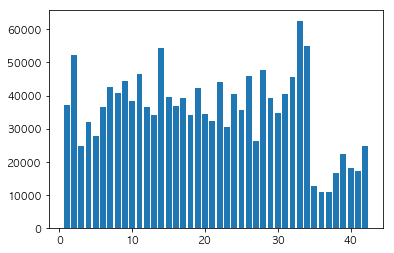

In [264]:
# x軸上で棒の並ぶ位置となる配列
x =  df["match day"]
#　グラフのy軸の値となる配列
y = df["y"]
# bar関数で棒グラフを描画
plt.bar(x,y);

In [62]:
player_data = scoring(player_data,player2011,player2012,player2013,playerWcup,playerWcupR,playerWcup2010)
player_data

,player,participation,p_score
0,秋元陽太,125,1.000
1,飯田真輝,122,0.976
2,南雄太,120,0.960
3,中林洋次,119,0.952
4,船山貴之,119,0.952
5,佐藤優也,118,0.944
6,廣瀬浩二,116,0.928
7,山口智,116,0.928
8,工藤浩平,115,0.920
9,片山奨典,114,0.912


In [115]:
#train.loc[:,["distance(min)"]]
train.loc[1,["distance(min)"]].values[0]

4

In [41]:
grouped = train.groupby('stadium')
grouped["y"].mean()

6456.020833333333

In [32]:
grouped = train.groupby('home area')
l = list(train["home area"].unique())
lmax = grouped["y"].mean().max()
area_dic = {}
for area in l:
    area_dic[area] = grouped["y"].mean()[area] / lmax
    
train["area rank"] = 0
for index,row in train.iterrows():
    train.loc[index,["area rank"]] = 1/area_dic[row["home area"]]

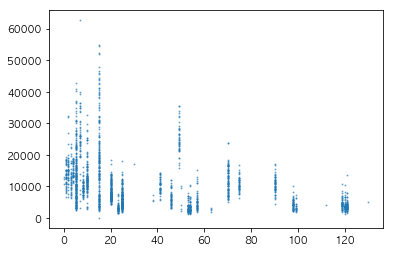

In [133]:
#　グラフのx軸の値となる配列
x =train[ train["home area"] == "tohoku"].
#　グラフのy軸の値となる配列
y = train2["y"]

# scatter関数で散布図を描画
plt.scatter(x, y, s=1, alpha=0.5);

In [ ]:
# x軸上で棒の並ぶ位置となる配列
x =train[ train["home area"] == "tohoku"]["y"]
#　グラフのy軸の値となる配列
y = df["y"]

# bar関数で棒グラフを描画
plt.bar(x,y);

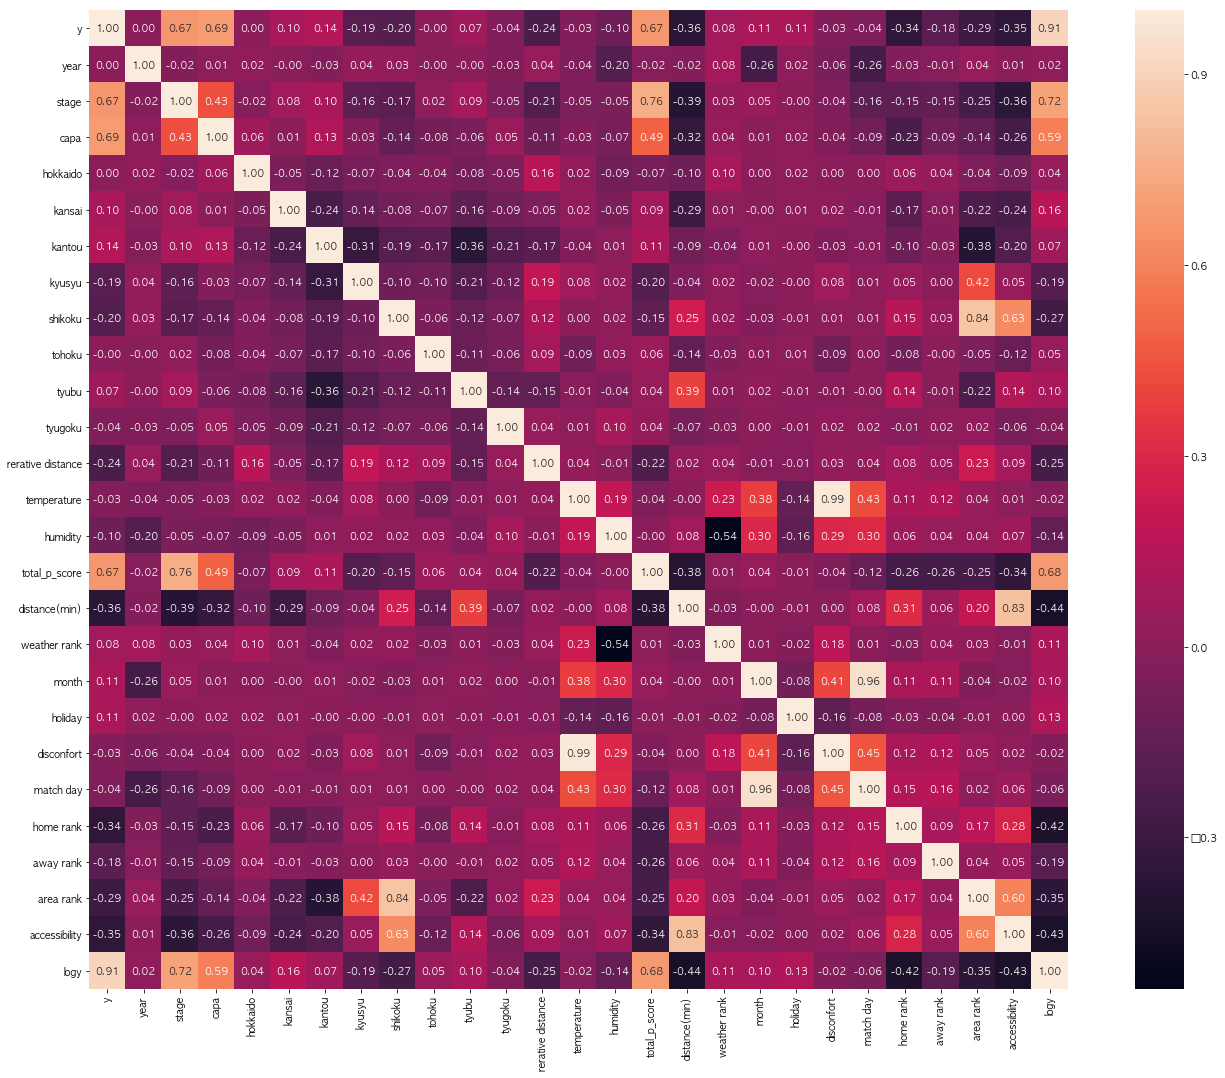

In [36]:
plt.figure(figsize=(12*2, 9*2))
# annot : 数値を表示するかどうか(annotation)
# square: 四角を正方形に合わせるかどうか
# fmt   : 表示する数値の形式(formatting)
#sns.heatmap(data1.drop(area_col, axis=1).corr(), annot=True, square=True, fmt='.2f')
sns.heatmap(train.corr(), annot=True, square=True, fmt='.2f')
plt.show()

In [65]:
train_m.loc[:,["away","away_area"]]

,away,away_area
0,鹿島アントラーズ,NaN
1,大宮アルディージャ,NaN
2,ジュビロ磐田,NaN
3,ＦＣ東京,NaN
4,清水エスパルス,NaN
5,コンサドーレ札幌,NaN
6,サンフレッチェ広島,NaN
7,サガン鳥栖,NaN
8,横浜Ｆ・マリノス,NaN
9,柏レイソル,NaN


In [74]:
{"a":3}
with open("param.txt", "w") as f:
    f.write(str({"a":3}))

